In [1]:
import numpy as np
from matplotlib import pyplot as plt   
import matplotlib.pyplot as plt
import pandas as pd
import math
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import cv2
plt.style.use(astropy_mpl_style)
#plt.style.use("default")
#import sys
#sys.path.append('/Users/shaivi/mypy/')
import tvg
from matplotlib import pyplot, image, transforms
from scipy import ndimage
import skimage

In [6]:
conti = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_conti_index.fits')
magincl = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magincl_index.fits')
magfield = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magfield_index.fits')
dopp = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_dopp1_index.fits')

num_scans = 59005
dim = conti[1].data.shape
data_conti = np.zeros((dim[0], dim[1], num_scans))
data_magincl = np.zeros((dim[0], dim[1], num_scans))
data_Bz = np.zeros((dim[0], dim[1], num_scans))
#data_dopp = np.zeros((dim[0], dim[1], num_scans))

for i in range(num_scans):
    data_conti_temp = conti[i+1].data
    #data_conti_2=(data_conti_temp - data_conti_temp.min())*(255.0/(data_conti_temp - data_conti_temp.min()).max())
    #data_conti[:,:,i] = data_conti_2
    data_conti[:,:,i] = data_conti_temp
    np.save('/Users/shaivi/Downloads/test_conti.npy', data_conti)
   
    data_magincl_temp = magincl[i+1].data
    #data_magincl_2=(data_magincl_temp - data_magincl_temp.min())*(255.0/(data_magincl_temp - data_magincl_temp.min()).max())
    #data_magincl[:,:,i] = data_magincl_2
    data_magincl[:,:,i] = data_magincl_temp
    np.save('/Users/shaivi/Downloads/test_magincl.npy', data_magincl)

    data_magfield_temp = magfield[i+1].data
    Bz_temp =  data_magfield_temp*(np.cos(np.array(np.deg2rad(data_magincl_temp))))
    #data_Bz_2=(Bz_temp - Bz_temp.min())*(255.0/(Bz_temp - Bz_temp.min()).max())
    #data_Bz[:,:,i] = data_Bz_2
    data_Bz[:,:,i] = Bz_temp
    
    np.save('/Users/shaivi/Downloads/test_Bz.npy', data_Bz)
    
    #data_dopp_temp = dopp[i+1].data
    #data_dopp_2=(data_dopp_temp - data_dopp_temp.min())*(255.0/(data_dopp_temp - data_dopp_temp.min()).max())
    #data_dopp[:,:,i] = data_dopp_2
    #np.save('/Users/shaivi/Downloads/test_dopp1.npy', data_dopp)
    
dim = data_Bz.shape
alltogether = np.zeros((dim[0], dim[1]*3, dim[2]))
j = 0; alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_conti
j = 1 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_magincl
j = 2 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_Bz
#j = 3 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_dopp

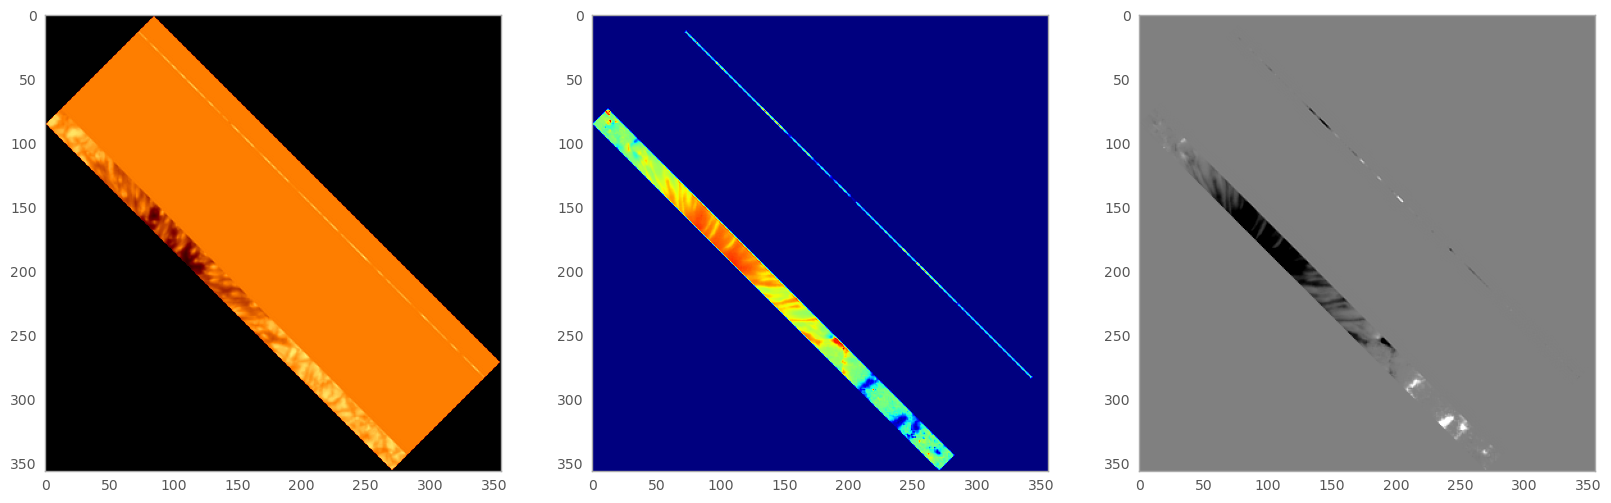

In [10]:
#METHOD 1
#pros: i mean it works, cons: cant really zoom in or make it easy to select specific parts or scale

from scipy.ndimage import rotate
#print(data_magfield_temp.shape, new_data_magincl_temp.shape)

new_data_conti_temp = rotate(data_conti_temp, angle=45)
new_data_magincl_temp = rotate(data_magincl_temp, angle=45)
new_data_Bz_temp = rotate(Bz_temp, angle=45)

plt.ion()
fig, ax = plt.subplots(1,3, figsize=[20,20])
ax[0].imshow(new_data_conti_temp[:,:], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(new_data_magincl_temp[:,:], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(new_data_Bz_temp[:,:], cmap='gray', vmin=-1250, vmax=1250)
plt.savefig("initial.png")
for j in range(3): ax[j].grid(False)
plt.show()

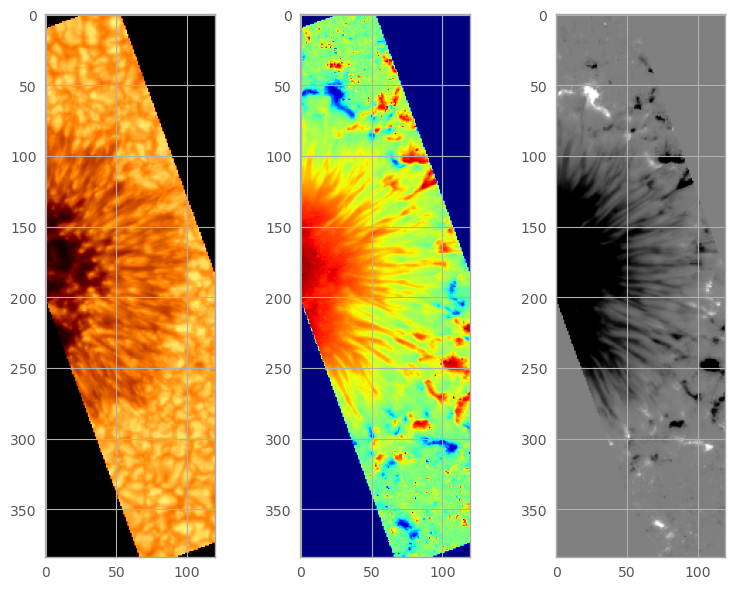

In [3]:
#METHOD 2
#pros: it works better! cons: may need ot shift and change for different filaments
from scipy import ndimage
import matplotlib.pyplot as plt

dc_rot = ndimage.rotate(data_conti, 20, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 20, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 20, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[:,:,0], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[:,:,0], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[:,:,0], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

#print(img.shape)
#print(img_45.shape)
#print(full_img_45.shape)
#if you want to make bigger, add "figsize=[10,15]" after 3 in plt.subplots(1,3)

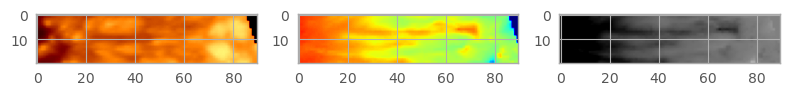

In [9]:
#METHOD 2 continued
dc_rot = ndimage.rotate(data_conti, 20, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 20, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 20, reshape=False)

a = 170
b = 190
c = 30
fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[a:b,c:,0], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[a:b,c:,0], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[a:b,c:,0], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

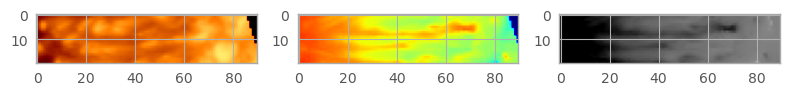

In [10]:
#METHOD 2 continued
dc_rot = ndimage.rotate(data_conti, 20, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 20, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 20, reshape=False)

a = 170
b = 190
c = 30
fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[a:b,c:,1], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[a:b,c:,1], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[a:b,c:,1], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

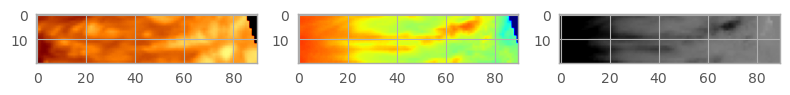

In [11]:
#METHOD 2 continued
dc_rot = ndimage.rotate(data_conti, 20, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 20, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 20, reshape=False)

a = 170
b = 190
c = 30
fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[a:b,c:,2], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[a:b,c:,2], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[a:b,c:,2], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

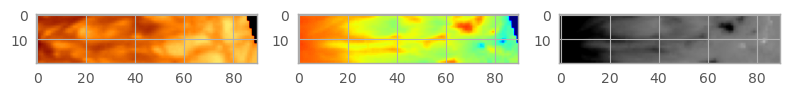

In [12]:
#METHOD 2 continued
dc_rot = ndimage.rotate(data_conti, 20, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 20, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 20, reshape=False)

a = 170
b = 190
c = 30
fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[a:b,c:,3], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[a:b,c:,3], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[a:b,c:,3], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

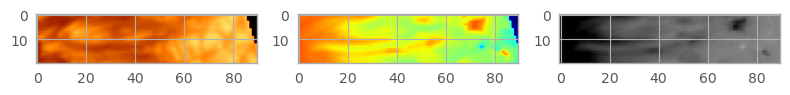

In [13]:
#METHOD 2 continued
dc_rot = ndimage.rotate(data_conti, 20, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 20, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 20, reshape=False)

a = 170
b = 190
c = 30
fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[a:b,c:,4], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[a:b,c:,4], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[a:b,c:,4], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

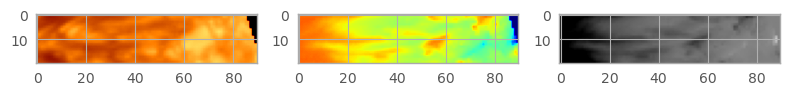

In [14]:
#METHOD 2 continued
dc_rot = ndimage.rotate(data_conti, 20, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 20, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 20, reshape=False)

a = 170
b = 190
c = 30
fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[a:b,c:,5], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[a:b,c:,5], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[a:b,c:,5], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

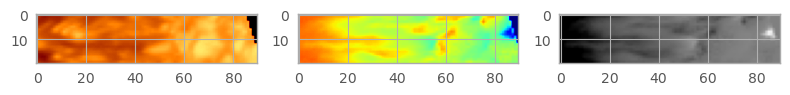

In [ ]:
#METHOD 2 continued
dc_rot = ndimage.rotate(data_conti, 20, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 20, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 20, reshape=False)

a = 170
b = 190
c = 30
fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[a:b,c:,6], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[a:b,c:,6], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[a:b,c:,6], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

In [37]:
#NOW DRAWING A LINE TO BE ABLE TO PLOT!

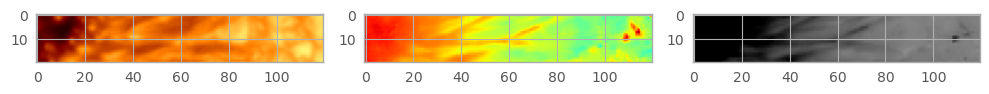

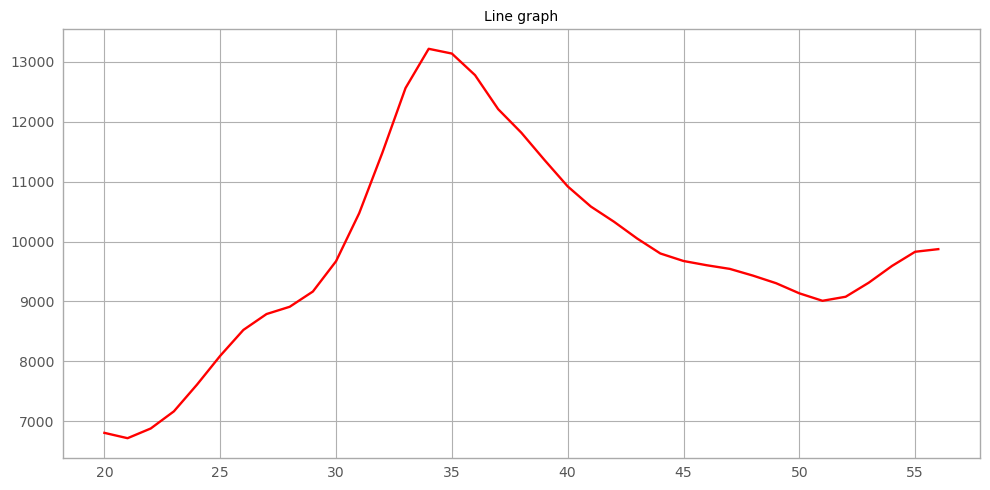

In [85]:
#METHOD 2 continued
dc_rot = ndimage.rotate(data_conti, 45, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 45, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 45, reshape=False)

a = 195
b = 215
fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[a:b,:,23], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[a:b,:,23], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[a:b,:,23], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
test = plt.show()

#pointA = (20,9)
#pointB = (57,9)
#plt.rcParams["figure.figsize"] = [10, 5]
#plt.rcParams["figure.autolayout"] = True

y = np.array([6805.46483973,  6716.34972812,  6878.55997297,  7164.82169551,
        7612.15759313,  8092.47470306,  8524.37527346,  8789.78124484,
        8911.19913233,  9165.68193435,  9671.4784997 , 10474.03786164,
       11483.79787394, 12563.63826037, 13219.12159787, 13139.67498277,
       12779.52985926, 12210.86630603, 11817.56492305, 11361.76990925,
       10921.6209128 , 10584.99323104, 10331.0503115 , 10050.64857674,
        9801.12051763,  9675.48664933,  9604.80401804,  9543.67572918,
        9431.20256245,  9304.27452006,  9135.77214503,  9010.9234284 ,
        9078.42811877,  9313.93030825,  9592.73971001,  9829.77501255,
        9873.64103511])
x = range(20,57)

plt.title("Line graph")
plt.plot(x,y, color="red")

plt.show()

In [42]:
##EXAMPLE: dc_rot[a:b,:,23][9][20:57] 
##[9] is the row of the line you are picking and [20:57] is the x range!
#Think of image as array and pull the values themselves #Gamma filament plot below

In [44]:
dc_rot = ndimage.rotate(data_conti, 20, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 20, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 20, reshape=False)

In [45]:
a = 170
b = 190
dc_rot[a:b,:,5][10][10:35]

array([ 4511.93227727,  5135.98270978,  5748.65760661,  6121.44912575,
        6092.79811039,  6180.58254911,  6245.45886474,  6158.19608561,
        5896.39232759,  5422.76490612,  5228.6330692 ,  5349.05410147,
        5763.10942719,  6161.4515695 ,  6556.94657647,  6634.11303267,
        6912.31316143,  7740.87597124,  9005.79862831,  9920.99546127,
       10215.03791299, 10149.11180275, 10204.8001624 , 10214.68010177,
       10204.07979694])

In [46]:
a = 170
b = 190
mi_rot[a:b,:,5][10][10:35]

array([160.38199737, 160.84235383, 159.13938293, 157.99982708,
       156.63703701, 157.70314369, 158.42335297, 159.17273601,
       159.7863845 , 159.17909923, 155.47460438, 154.26490507,
       155.6983962 , 154.12805705, 153.1842047 , 152.39070444,
       150.81925367, 149.15686677, 147.19445441, 145.26367252,
       143.5290404 , 142.98485876, 142.34742051, 140.88423484,
       140.86928344])

In [47]:
a = 170
b = 190
bz_rot[a:b,:,5][10][10:35]

array([-2014.62980148, -2037.78856862, -1950.18091543, -1841.18487609,
       -1762.41579877, -1784.26503607, -1809.27855542, -1806.81565592,
       -1851.87399046, -1820.87366893, -1828.69546154, -1811.49306364,
       -1870.64622087, -1800.87456546, -1808.40728022, -1775.0485383 ,
       -1729.25456349, -1747.68914316, -1722.5143939 , -1652.23976546,
       -1551.18630948, -1449.15064896, -1421.55973937, -1356.83801389,
       -1327.42765893])

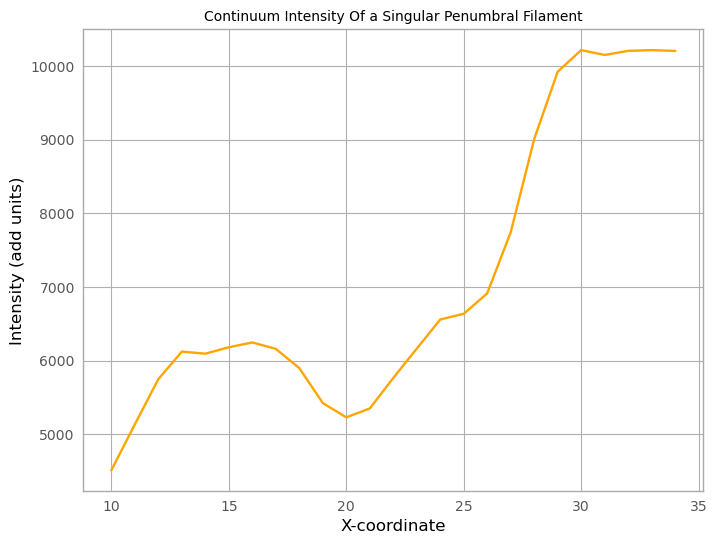

In [48]:
y = np.array([ 4511.93227727,  5135.98270978,  5748.65760661,  6121.44912575,
        6092.79811039,  6180.58254911,  6245.45886474,  6158.19608561,
        5896.39232759,  5422.76490612,  5228.6330692 ,  5349.05410147,
        5763.10942719,  6161.4515695 ,  6556.94657647,  6634.11303267,
        6912.31316143,  7740.87597124,  9005.79862831,  9920.99546127,
       10215.03791299, 10149.11180275, 10204.8001624 , 10214.68010177,
       10204.07979694])
x = range(10,35)

plt.title("Continuum Intensity Of a Singular Penumbral Filament")
plt.xlabel("X-coordinate")
plt.ylabel("Intensity (add units)")
plt.plot(x,y, color="orange")

plt.show()

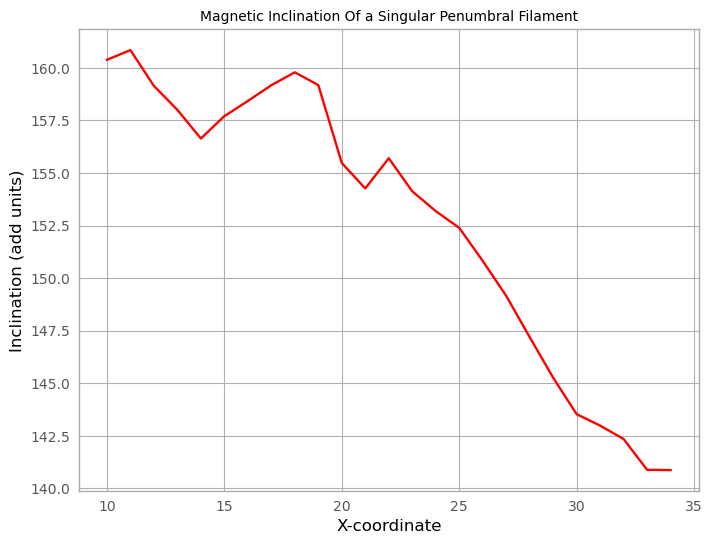

In [49]:
y = np.array([160.38199737, 160.84235383, 159.13938293, 157.99982708,
       156.63703701, 157.70314369, 158.42335297, 159.17273601,
       159.7863845 , 159.17909923, 155.47460438, 154.26490507,
       155.6983962 , 154.12805705, 153.1842047 , 152.39070444,
       150.81925367, 149.15686677, 147.19445441, 145.26367252,
       143.5290404 , 142.98485876, 142.34742051, 140.88423484,
       140.86928344])
x = range(10,35)

plt.title("Magnetic Inclination Of a Singular Penumbral Filament")
plt.xlabel("X-coordinate")
plt.ylabel("Inclination (add units)")
plt.plot(x,y, color="red")

plt.show()

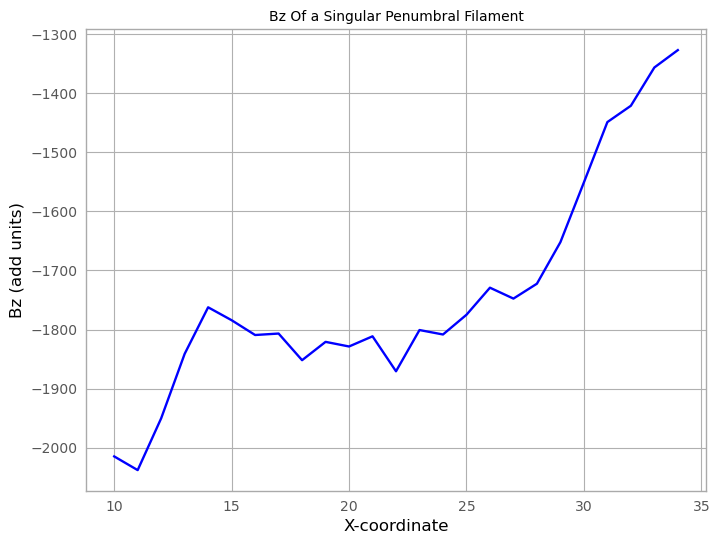

In [50]:
y = np.array([-2014.62980148, -2037.78856862, -1950.18091543, -1841.18487609,
       -1762.41579877, -1784.26503607, -1809.27855542, -1806.81565592,
       -1851.87399046, -1820.87366893, -1828.69546154, -1811.49306364,
       -1870.64622087, -1800.87456546, -1808.40728022, -1775.0485383 ,
       -1729.25456349, -1747.68914316, -1722.5143939 , -1652.23976546,
       -1551.18630948, -1449.15064896, -1421.55973937, -1356.83801389,
       -1327.42765893])

x = range(10,35)

plt.title("Bz Of a Singular Penumbral Filament")
plt.xlabel("X-coordinate")
plt.ylabel("Bz (add units)")
plt.plot(x,y, color="blue")

plt.show()